# Cartographie des plaintes dans l'Etat de new York 

In [128]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from geopandas import GeoDataFrame

In [93]:
pathgeo = "https://raw.githubusercontent.com/ndrettakis/Police-Misconduct-Stat-app/main/police_precincts.geojson"
precinct = gpd.read_file(pathgeo)

<AxesSubplot:>

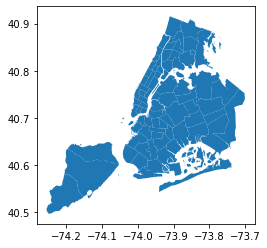

In [115]:
precinct.plot()

In [53]:
pathdata="https://raw.githubusercontent.com/ndrettakis/Police-Misconduct-Stat-app/main/allegations_202007271729.xlsx"
df=pd.read_excel(pathdata)
df=df[df['year_received']>=2000]
#df=df[df['precinct']!="1000.0"and "" and "0.0"]


In [80]:
df['precinct']=df['precinct'].astype('Int64')
df['precinct']

0        44
1        46
2        52
3        67
4        67
         ..
33353    72
33354    72
33355    72
33356    72
33357    72
Name: precinct, Length: 31686, dtype: Int64

In [103]:
df_nb_by_precinct=pd.DataFrame(df['precinct'].value_counts())
df_nb_by_precinct=df_nb_by_precinct.reset_index()
df_nb_by_precinct=df_nb_by_precinct.rename(columns={'index':"Precinct",'precinct':"number_complaint"})

In [104]:
df_nb_by_precinct

,Precinct,number_complaint
0,75,2096
1,73,1148
2,44,1086
3,46,1073
4,67,1055
...,...,...
73,66,84
74,17,74
75,111,36
76,22,12


In [119]:
carte=pd.merge(df_nb_by_precinct,precinct,on="Precinct")
carte = carte[['Precinct','Shape_Leng','Shape_Area','geometry','number_complaint']]
carte

,Precinct,Shape_Leng,Shape_Area,geometry,number_complaint
0,75,112553.600150,1.932422e+08,"MULTIPOLYGON (((-73.84734 40.62909, -73.84985 ...",2096
1,73,33034.660940,5.177186e+07,"POLYGON ((-73.90405 40.67922, -73.90334 40.678...",1148
2,44,31396.645142,5.552997e+07,"POLYGON ((-73.90270 40.84458, -73.90271 40.844...",1086
3,46,29611.724991,3.832326e+07,"POLYGON ((-73.89138 40.86170, -73.89142 40.861...",1073
4,67,43288.882029,9.374470e+07,"POLYGON ((-73.90755 40.65119, -73.90849 40.650...",1055
...,...,...,...,...,...
71,20,27040.743169,2.767083e+07,"POLYGON ((-73.96934 40.78529, -73.96983 40.784...",90
72,66,52361.498985,9.952021e+07,"POLYGON ((-73.97140 40.64826, -73.97121 40.647...",84
73,17,24579.941395,2.227068e+07,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ...",74
74,111,97510.946949,2.603463e+08,"POLYGON ((-73.71352 40.75984, -73.71358 40.759...",36


In [147]:
min(carte['number_complaint'])

12

In [129]:
carte = GeoDataFrame(carte)

<AxesSubplot:>

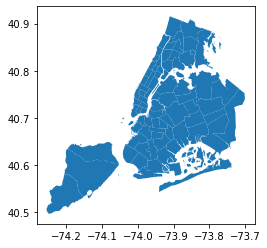

In [136]:
precinct.plot()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

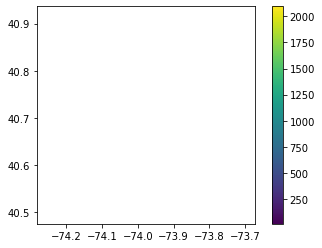

In [139]:
carte.plot(column='number_complaint',legend=True, missing_kwds={'color': 'lightgrey'})

Text(0.5, 1.0, 'Percent of responders who know English')

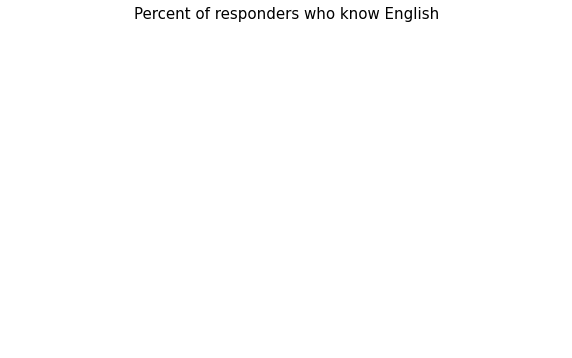

In [132]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Percent of responders who know English', fontdict={'fontsize': '15', 'fontweight' : '3'})

In [133]:
carte.plot(column='Precinct',
            cmap='RdPu',
            linewidth=0.9,
            ax=ax,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)

<AxesSubplot:title={'center':'Percent of responders who know English'}>

<Figure size 432x288 with 0 Axes>